In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import os, fnmatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
%matplotlib inline
from keras.layers import Input, Dense
from keras.models import Model
# from keras.op
from keras import optimizers
from keras import regularizers
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import os
import pickle
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

Using TensorFlow backend.


In [2]:
class_path = "./DataCreation/Dataset/Train_8bit/"
data_train = []
data_train_names = os.listdir(class_path)
pattern = "*.tiff"
for entry in data_train_names:
    if fnmatch.fnmatch(entry, pattern):
            data_train.append(class_path+entry)

In [3]:
print(len(data_train_names), len(data_train))

9451 9451


In [4]:
class_path = "./DataCreation/Dataset/Test_8bit/"
data_test = []
data_test_names = os.listdir(class_path)
pattern = "*.tiff"
for entry in data_test_names:
    if fnmatch.fnmatch(entry, pattern):
            data_test.append(class_path+entry)

In [5]:
print(len(data_test_names), len(data_test))

2708 2708


In [6]:
data_train_list = []
for i in range(len(data_train)):
    arr_obj = []
    cl = (data_train[i].split("/")[4]).split("~~~")[0]
    if cl == "Sy1" or cl == "cv" or cl == "WD" or cl == "QSO": continue
    arr_obj.append(cl)
    arr_obj.append(data_train[i])
    data_train_list.append(arr_obj)
    
data_test_list = []
for i in range(len(data_test)):
    arr_obj = []
    cl = (data_test[i].split("/")[4]).split("~~~")[0]
    if cl == "Sy1" or cl == "cv" or cl == "WD" or cl == "QSO": continue
    arr_obj.append(cl)
    arr_obj.append(data_test[i])
    data_test_list.append(arr_obj)

In [7]:
print(len(data_train_list), len(data_test_list))

6826 1953


In [8]:
df_train = pd.DataFrame(data_train_list)
df_test = pd.DataFrame(data_test_list)

In [9]:
df_train.head()

,0,1
0,C,./DataCreation/Dataset/Train_8bit/C~~~0445+010...
1,C,./DataCreation/Dataset/Train_8bit/C~~~0445+010...
2,C,./DataCreation/Dataset/Train_8bit/C~~~0445+010...
3,C,./DataCreation/Dataset/Train_8bit/C~~~0445+010...
4,C,./DataCreation/Dataset/Train_8bit/C~~~0445+010...


In [10]:
df_test.head()

,0,1
0,C,./DataCreation/Dataset/Test_8bit/C~~~0833-0605...
1,C,./DataCreation/Dataset/Test_8bit/C~~~0833-0605...
2,C,./DataCreation/Dataset/Test_8bit/C~~~0833-0605...
3,C,./DataCreation/Dataset/Test_8bit/C~~~0833-0605...
4,C,./DataCreation/Dataset/Test_8bit/C~~~0833-0605...


In [11]:
df_train[0].value_counts()

sd     2750
C      1650
Mrk    1525
M       770
PN      131
Name: 0, dtype: int64

In [12]:
df_test[0].value_counts()

sd     785
C      470
Mrk    430
M      220
PN      48
Name: 0, dtype: int64

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_train[0])
df_train[0]=le.transform(df_train[0])

In [14]:
df_train[0].value_counts()

4    2750
0    1650
2    1525
1     770
3     131
Name: 0, dtype: int64

In [15]:
for index, Row in df_test.iterrows():
    cl = Row[0]
    if cl == 'sd':
        df_test.at[index, 0] = 4
    elif cl == "C":
        df_test.at[index, 0] = 0
    elif cl == "Mrk":
        df_test.at[index, 0] = 2
    elif cl == "M":
        df_test.at[index, 0] = 1
    elif cl == "PN":
        df_test.at[index, 0] = 3
#    elif cl == "Sy1":
#        df_test.at[index, 0] = 5
#    elif cl == "WD":
#        df_test.at[index, 0] = 6
#    elif cl == "PN":
#        df_test.at[index, 0] = 3
#    elif cl == "cv":
#        df_test.at[index, 0] = 7

In [16]:
df_test[0].value_counts()

4    785
0    470
2    430
1    220
3     48
Name: 0, dtype: int64

In [17]:
X_tr = df_train.iloc[:, 1]
Y_tr = df_train.iloc[:, 0]
X_tr = X_tr.values
Y_tr = Y_tr.values

X_ts = df_test.iloc[:, 1]
Y_ts = df_test.iloc[:, 0]
X_ts = X_ts.values
Y_ts = Y_ts.values

In [18]:
images_list_train = []
max_width = 0
max_height = 0
ind = 0
for i in range(len(X_tr)):
    im = Image.open(X_tr[i])
    arr = np.array(im)#.flatten()
    
    arr=(arr-arr.min())/(arr.max()-arr.min())
    #arr = arr / 0xffff
    s = arr.shape
    if s[0] > max_height:
        max_height = s[0]
    if s[1] > max_width:
        max_width = s[1]
        ind = i
    images_list_train.append(arr)
    
images_list_test = []
ind = 0
for i in range(len(X_ts)):
    im = Image.open(X_ts[i])
    arr = np.array(im)#.flatten()
    
    arr=(arr-arr.min())/(arr.max()-arr.min())
    #arr = arr / 0xffff
    s = arr.shape
    if s[0] > max_height:
        max_height = s[0]
    if s[1] > max_width:
        max_width = s[1]
        ind = i
    images_list_test.append(arr)

In [19]:
max_width = 50
max_height = 160

In [20]:
print(max_width, max_height)

50 160


In [21]:
for i in range(len(images_list_train)):
    s = images_list_train[i].shape
    d_width = (max_width - s[1])
    d_height = (max_height - s[0])
    
    d_top = int(d_height / 2)
    d_bottom = int(d_height - d_top)
    
    d_left = int(d_width / 2)
    d_right = int(d_width - d_left)
    #print(d_top, d_bottom, d_left, d_right)
    
    arr = images_list_train[i]
    for l in range(d_left):
        arr = np.insert(arr, 0, 0, axis = 1)
    
    for r in range(d_right):
        b = np.zeros((s[0],1))
        arr = np.append(arr, b, axis = 1)
    
    for t in range(d_top):
        arr = np.insert(arr, 0, 0, axis = 0)
    
    for b in range(d_bottom):
        b = np.zeros((1, arr.shape[1],))
        arr = np.append(arr, b, axis = 0)
    
    images_list_train[i] = arr.flatten()

for i in range(len(images_list_test)):
    s = images_list_test[i].shape
    d_width = (max_width - s[1])
    d_height = (max_height - s[0])
    
    d_top = int(d_height / 2)
    d_bottom = int(d_height - d_top)
    
    d_left = int(d_width / 2)
    d_right = int(d_width - d_left)
    #print(d_top, d_bottom, d_left, d_right)
    
    arr = images_list_test[i]
    for l in range(d_left):
        arr = np.insert(arr, 0, 0, axis = 1)
    
    for r in range(d_right):
        b = np.zeros((s[0],1))
        arr = np.append(arr, b, axis = 1)
    
    for t in range(d_top):
        arr = np.insert(arr, 0, 0, axis = 0)
    
    for b in range(d_bottom):
        b = np.zeros((1, arr.shape[1],))
        arr = np.append(arr, b, axis = 0)
    
    images_list_test[i] = arr.flatten()

In [22]:
32

32

In [23]:
from tensorflow.python.client import device_lib
import tensorflow as tf
import keras
#print(device_lib.list_local_devices())

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [24]:
images_np_train = np.array(images_list_train)
images_np_test = np.array(images_list_test)

In [25]:
class_count = 5
X_train = images_np_train
Y_train = Y_tr
Y_train = keras.utils.to_categorical(Y_train, class_count)

X_test = images_np_test
Y_test = Y_ts
Y_test = keras.utils.to_categorical(Y_test, class_count)

In [26]:
X_train = X_train.reshape(X_train.shape[0], max_height, max_width, 1)
X_test = X_test.reshape(X_test.shape[0], max_height, max_width, 1)
input_shape = (max_height, max_width, 1)

In [27]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (6826, 160, 50, 1)
6826 train samples
1953 test samples


In [28]:
#from keras.models import Sequential
#from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#
#model = Sequential()
#model.add(Conv2D(128, kernel_size=(3,3), input_shape=input_shape, padding="same"))
#model.add(MaxPooling2D(pool_size=(3, 1)))
#
#model.add(Conv2D(64, (3, 3), padding="same"))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(3, 1)))
#
#model.add(Conv2D(32, (3, 3), padding="same"))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(3, 4)))
#
#model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
#model.add(Dense(128, activation=tf.nn.relu))
#model.add(Dropout(0.5))
#model.add(Dense(class_count,activation=tf.nn.softmax))

# kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), input_shape=input_shape, padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))

#model.add(Conv2D(32, (3, 3), padding="same"))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(class_count,activation=tf.nn.softmax))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 160, 50, 128)      1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 25, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 25, 128)       147584    
_________________________________________________________________
activation_1 (Activation)    (None, 80, 25, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 80, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 80, 12, 64)        73792     
_________________________________________________________________
activation_2 (Activation)    (None, 80, 12, 64)        0         
__________

In [30]:
adadelta = optimizers.Adadelta(lr=0.01, rho=0.95)
model.compile(optimizer=adadelta , loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
#cw = {0:1, 1:1, 2:1, 3:1, 4:1}
cw = {0:3, 1:4, 2:3, 3:4, 4:3}
#1 stage 35
#2 stage 
history = model.fit(X_train, Y_train, epochs = 35, batch_size = 8, shuffle=True, validation_data=(X_test, Y_test), class_weight=cw)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 6826 samples, validate on 1953 samples
Epoch 1/35




6826/6826 [==============================] - 37s 5ms/step - loss: 3.4481 - acc: 0.5841 - val_loss: 0.7567 - val_acc: 0.7373
Epoch 2/35
6826/6826 [==============================] - 31s 5ms/step - loss: 2.2444 - acc: 0.7641 - val_loss: 0.6500 - val_acc: 0.7793
Epoch 3/35
6826/6826 [==============================] - 31s 5ms/step - loss: 2.0079 - acc: 0.7890 - val_loss: 0.5997 - val_acc: 0.8059
Epoch 4/35
6826/6826 [==============================] - 31s 5ms/step - loss: 1.8339 - acc: 0.8063 - val_loss: 0.5424 - val_acc: 0.8100
Epoch 5/35
6826/6826 [==============================] - 31s 5ms/step - loss: 1.7136 - acc: 0.8198 - val_loss: 0.5102 - val_acc: 0.8172
Epoch 6/35
6826/6826 [==============================] - 31s 5ms/step - loss: 1.6462 - acc: 0.8312 - val_loss: 0.4774 - val_acc: 0.8361
Epoch 7/35
6826/6826 [====================

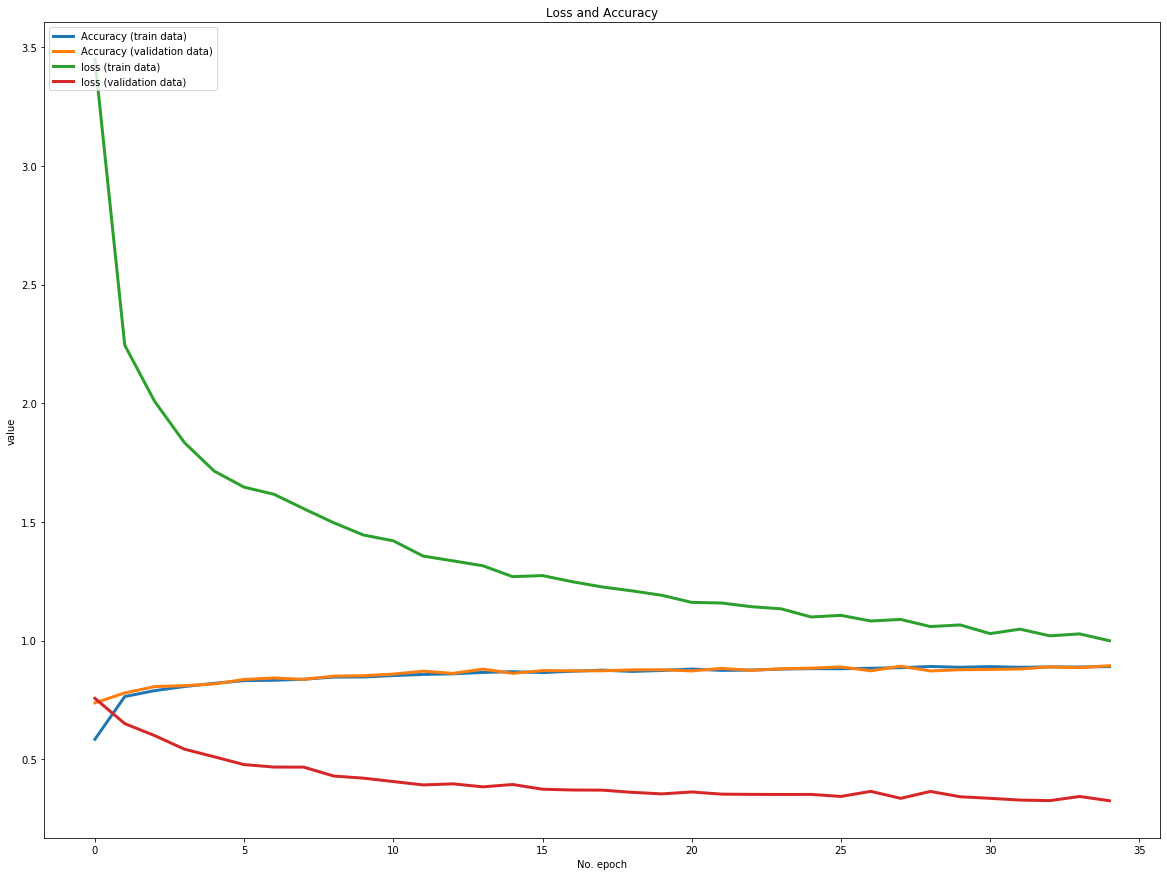

In [42]:
plt.plot(history.history['acc'], label='Accuracy (train data)', linewidth=3, markersize=12)
plt.plot(history.history['val_acc'], label='Accuracy (validation data)', linewidth=3, markersize=12)
plt.plot(history.history['loss'], label='loss (train data)', linewidth=3, markersize=12)
plt.plot(history.history['val_loss'], label='loss (validation data)', linewidth=3, markersize=12)
plt.title('Loss and Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = (20,15)
plt.show()

In [43]:
prediction = model.predict(X_test)

In [44]:
for i in range(len(prediction)):
    prediction[i] = prediction[i] > 0.90

In [47]:
model_json = model.to_json()
with open("model_the_last_one.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_the_last_one.h5")
print("Saved model to disk")

Saved model to disk
